# Import

## Library

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score
# from helpers import report_clustering_kmeans, report_clustering_hierarchical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


               alpha-2 alpha-3  country-code     iso_3166-2   region  \
name                                                                   
Afghanistan         AF     AFG             4  ISO 3166-2:AF     Asia   
Åland Islands       AX     ALA           248  ISO 3166-2:AX   Europe   
Albania             AL     ALB             8  ISO 3166-2:AL   Europe   
Algeria             DZ     DZA            12  ISO 3166-2:DZ   Africa   
American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

                     sub-region intermediate-region  region-code  \
name                                                               
Afghanistan       Southern Asia                 NaN        142.0   
Åland Islands   Northern Europe                 NaN        150.0   
Albania         Southern Europe                 NaN        150.0   
Algeria         Northern Africa                 NaN          2.0   
American Samoa        Polynesia                 NaN          9.0   

                su

## Dataset

In [64]:
df = pd.read_csv( 'https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv?raw=true')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [65]:
df.columns.values

array(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'], dtype=object)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


# EDA

In [66]:
X = df[['total','ins_losses']]
X

,total,ins_losses
0,18.8,145.08
1,18.1,133.93
2,18.6,110.35
3,22.4,142.39
4,12.0,165.63
5,13.6,139.91
6,10.8,167.02
7,16.2,151.48
8,5.9,136.05
9,17.9,144.18


In [67]:
scaler = MinMaxScaler()

In [68]:
X_scal = pd.DataFrame(scaler.fit_transform(X))

In [69]:
# y = iris[['Species']]
# enc = preprocessing.LabelEncoder()
# y = enc.fit_transform(y)
# y

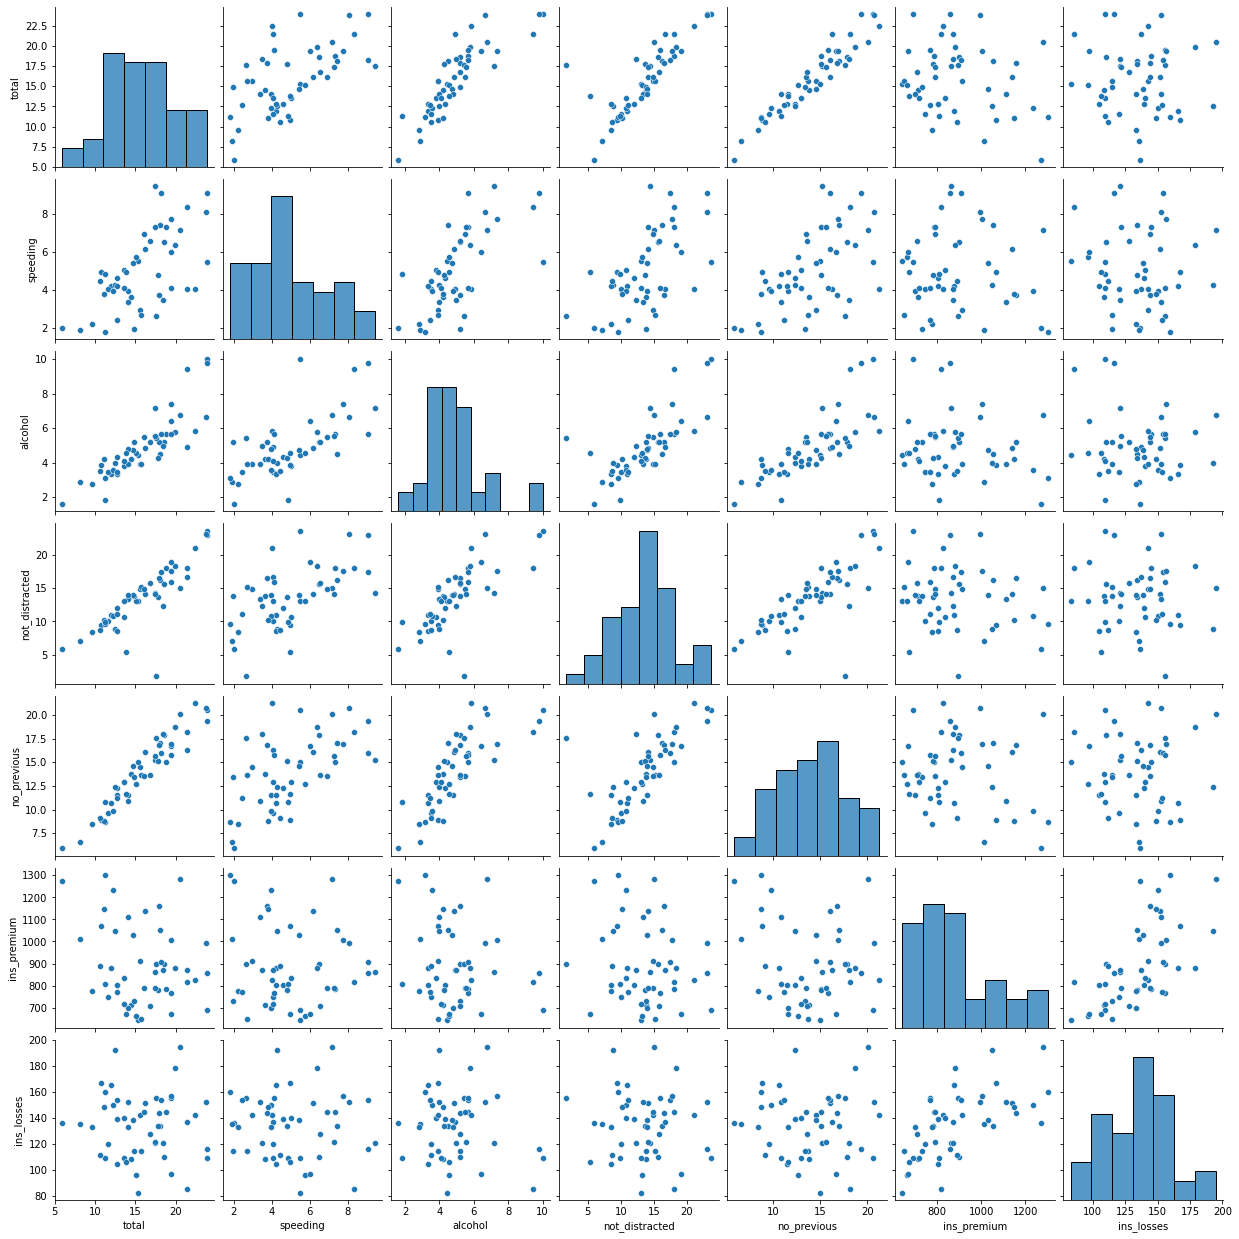

In [70]:
sns.pairplot(df)

# KMeans

In [71]:
pd.DataFrame(X_scal)

,0,1
0,0.716667,0.556369
1,0.677778,0.456842
2,0.705556,0.246363
3,0.916667,0.532357
4,0.338889,0.739802
5,0.427778,0.510220
6,0.272222,0.752209
7,0.572222,0.613496
8,0.000000,0.475765
9,0.666667,0.548335


<AxesSubplot:xlabel='0', ylabel='1'>

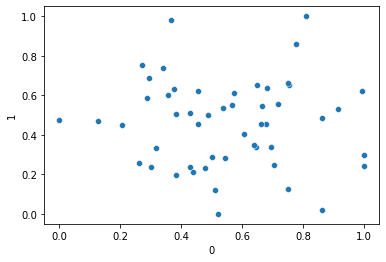

In [72]:
# Plot reference
sns.scatterplot(x=0,y=1 ,data=pd.DataFrame(X_scal))

## KMeans train

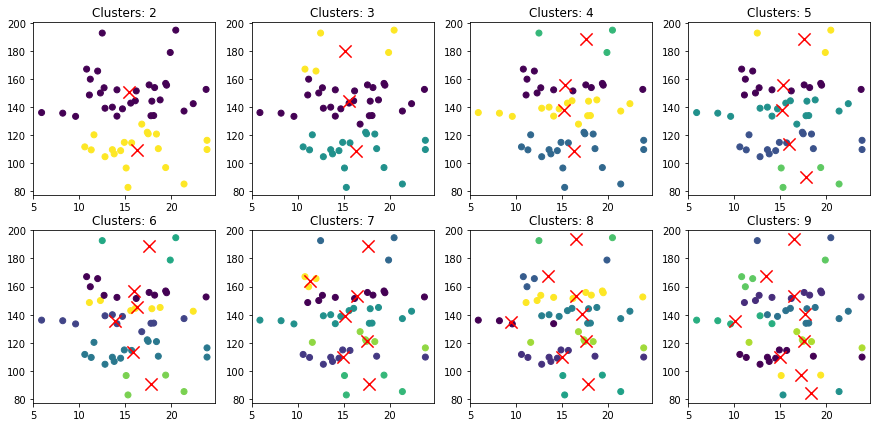

In [73]:
# Metrics
dist_cent = []
sil_list = []
rand_list = []

fig,axs = plt.subplots(2,4,figsize=(15,7))
axs = axs.ravel()    
for i,k in enumerate(range(2, 10)):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(X)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    # Silhouttte Score
    sil_score_i = silhouette_score(X,labels_i)
    sil_list.append(sil_score_i)        
#     # Rand_Index
# #     rand_index_i = metrics.adjusted_rand_score(y,labels_i)
# #     rand_list.append(rand_index_i)
    dist_cent.append(cluster.inertia_)
    # Plots de los clusters
    axs[i].scatter(x='total',y='ins_losses' ,data=X,c=labels_i)
    axs[i].scatter(centers_i[:,0], centers_i[:,1], marker="x", color='r',s=150)
    axs[i].set_title('Clusters: ' + str(k))
plt.show()

## Performance Metrics

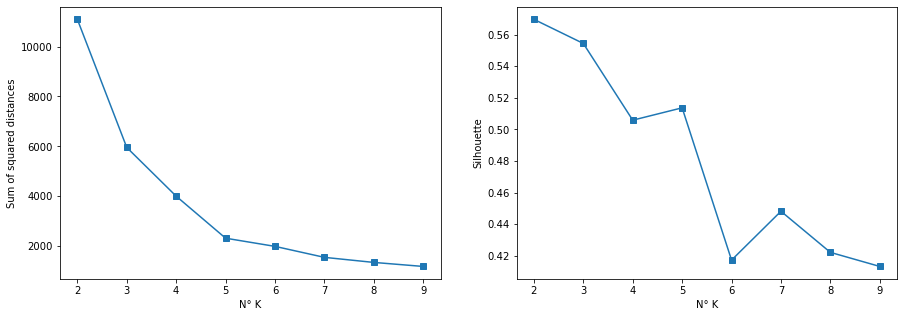

In [74]:
# Sum of squared distances
fig, axs = plt.subplots(1,2,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
# axs[2].plot(range(2, 10), rand_list, marker='s');
# axs[2].set_xlabel('N° K')
# axs[2].set_ylabel('Rand Index')    
plt.show()

In [75]:
X_scal

,0,1
0,0.716667,0.556369
1,0.677778,0.456842
2,0.705556,0.246363
3,0.916667,0.532357
4,0.338889,0.739802
5,0.427778,0.510220
6,0.272222,0.752209
7,0.572222,0.613496
8,0.000000,0.475765
9,0.666667,0.548335


In [81]:
# Make k-means clusterer
km = KMeans(3, random_state=0)
# Fit clusterer
km.fit(X_scal)
# Predict values
X_scal["group"] = km.predict(X_scal)
# View first few observations
X_scal.head(10)

,0,1,group
0,0.716667,0.556369,1
1,0.677778,0.456842,1
2,0.705556,0.246363,0
3,0.916667,0.532357,1
4,0.338889,0.739802,2
5,0.427778,0.510220,2
6,0.272222,0.752209,2
7,0.572222,0.613496,1
8,0.000000,0.475765,2
9,0.666667,0.548335,1


## Real data set and the result K-means

<AxesSubplot:xlabel='0', ylabel='1'>

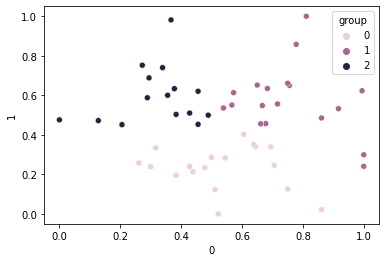

In [87]:
sns.scatterplot(x=0,y=1, data=X_scal,hue='group', color = 'blue')